In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
#calculations for question 1 a
test = models.Sequential()
test.add(layers.InputLayer(input_shape=(64,64,16)))
test.add(layers.Conv2D(32, (3,3), padding='same'))

2022-11-14 21:00:14.314825: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
test.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        4640      
Total params: 4,640
Trainable params: 4,640
Non-trainable params: 0
_________________________________________________________________


In [5]:
#calculations for question 1 a
test = models.Sequential()
test.add(layers.InputLayer(input_shape=(64,64,16)))
test.add(layers.Conv2D(5, (1,1), padding='same'))
test.add(layers.Conv2D(32, (3,3), padding='same'))

In [6]:
test.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 5)         85        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        1472      
Total params: 1,557
Trainable params: 1,557
Non-trainable params: 0
_________________________________________________________________


In [7]:
train_images = np.load('../input/cisc6000-deep-learning-hw2/cifar.train.npy')
train_labels = np.load('../input/cisc6000-deep-learning-hw2/cifar.trainlabel.npy')

test_images = np.load('../input/cisc6000-deep-learning-hw2/cifar.test.npy')
test_labels = pd.read_csv('../input/cisc6000-deep-learning-hw2/cifar.testlabel.csv',usecols=[1],index_col=False)
test_labels
test_labels = test_labels.to_numpy()

#train_images, test_images = train_images / 255.0, test_images/255.0

In [8]:
#check image and label shapes
print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)

Train samples: (48000, 3, 32, 32) (48000,)
Test samples: (12000, 3, 32, 32) (12000, 1)


In [9]:
#transpose images to correct format for model
train_images=train_images.transpose(0,2,3,1)
test_images=test_images.transpose(0,2,3,1)

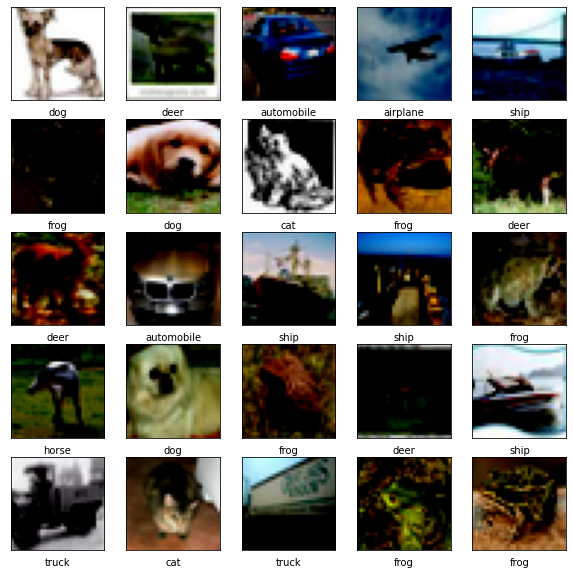

In [10]:
#check images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
#one hot encode labels
#train_labels = tf.keras.utils.to_categorical(train_labels,10)
#test_labels = tf.keras.utils.to_categorical(test_labels,10)

In [12]:
#check encoded labels
for i in range(10):
    print(train_labels[i])

5
4
1
0
8
6
5
3
6
4


In [13]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images,train_labels,test_size=0.2,random_state=42)

In [14]:
#creating concolutional model
Mbase = models.Sequential()
Mbase.add(layers.InputLayer(input_shape=(32,32,3)))
Mbase.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
Mbase.add(layers.MaxPooling2D(2,2))
Mbase.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
Mbase.add(layers.MaxPooling2D(2,2))
Mbase.add(layers.Conv2D(48, (3,3), activation='relu', padding='same'))

In [15]:
Mbase.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 48)          13872     
Total params: 18,960
Trainable params: 18,960
Non-trainable params: 0
_________________________________________________________________


In [16]:
Mbase.add(layers.Flatten())
Mbase.add(layers.Dense(500, activation='relu'))
Mbase.add(layers.Dense(10, activation='softmax'))

In [17]:
Mbase.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 48)          13872     
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 500)              

In [18]:
#model timer
from timeit import default_timer as timer

class TimingCallback(tf.keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)
        
cb = TimingCallback()

In [19]:
Mbase.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [20]:
checkpoint = ModelCheckpoint('.model_base.hdf5',save_best_only = True, monitor = 'val_loss', mode = 'min')

In [21]:
callbacks = [cb,checkpoint]

In [22]:
history = Mbase.fit(train_images, 
                    train_labels, 
                    batch_size=128,
                    epochs=80,
                    validation_data=(val_images,val_labels),
                    callbacks = callbacks
                   )

2022-11-14 21:00:32.174177: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/80
300/300 [==============================] - 15s 48ms/step - loss: 1.4244 - accuracy: 0.4930 - val_loss: 1.1684 - val_accuracy: 0.5852
Epoch 2/80
300/300 [==============================] - 15s 49ms/step - loss: 1.0526 - accuracy: 0.6281 - val_loss: 1.0197 - val_accuracy: 0.6431
Epoch 3/80
300/300 [==============================] - 14s 47ms/step - loss: 0.8854 - accuracy: 0.6878 - val_loss: 0.9864 - val_accuracy: 0.6609
Epoch 4/80
300/300 [==============================] - 14s 46ms/step - loss: 0.7584 - accuracy: 0.7344 - val_loss: 0.9136 - val_accuracy: 0.6818
Epoch 5/80
300/300 [==============================] - 14s 48ms/step - loss: 0.6440 - accuracy: 0.7771 - val_loss: 0.8749 - val_accuracy: 0.6943
Epoch 6/80
300/300 [==============================] - 14s 45ms/step - loss: 0.5336 - accuracy: 0.8149 - val_loss: 0.9300 - val_accuracy: 0.6929
Epoch 7/80
300/300 [==============================] - 15s 48ms/step - loss: 0.4221 - accuracy: 0.8543 - val_loss: 0.9113 - val_accuracy:

375/375 - 2s - loss: 3.8942 - accuracy: 0.6941


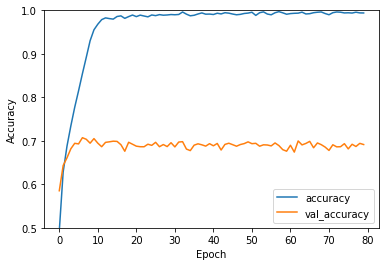

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = Mbase.evaluate(test_images,  test_labels, verbose=2)

In [24]:
print('Test Accuracy:',test_acc)
print('Time:',sum(cb.logs))

Test Accuracy: 0.6940833330154419
Time: 1119.2795763840004


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = Mbase.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(test_labels, y_pred_classes))

matrix = confusion_matrix(test_labels,y_pred_classes) 
print(matrix.diagonal()/matrix.sum(axis=1))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.75      0.75      1237
           1       0.84      0.78      0.81      1217
           2       0.61      0.56      0.59      1166
           3       0.50      0.46      0.48      1134
           4       0.63      0.67      0.65      1243
           5       0.63      0.53      0.58      1242
           6       0.69      0.82      0.75      1146
           7       0.74      0.74      0.74      1213
           8       0.79      0.85      0.82      1216
           9       0.71      0.78      0.74      1186

    accuracy                           0.69     12000
   macro avg       0.69      0.69      0.69     12000
weighted avg       0.69      0.69      0.69     12000

[0.74696847 0.77978636 0.5626072  0.45590829 0.67095736 0.53140097
 0.82024433 0.73784007 0.84703947 0.77908938]


In [26]:
#Build a new model Mbatch by adding batch normalization
#from tf.keras.layers.normalization import BatchNormalization

Mbatch = models.Sequential()
Mbatch.add(layers.InputLayer(input_shape=(32,32,3)))
Mbatch.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
Mbatch.add(layers.BatchNormalization())
Mbatch.add(layers.MaxPooling2D(2,2))
Mbatch.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
Mbatch.add(layers.BatchNormalization())
Mbatch.add(layers.MaxPooling2D(2,2))
Mbatch.add(layers.Conv2D(48, (3,3), activation='relu', padding='same'))
Mbatch.add(layers.BatchNormalization())
Mbatch.add(layers.Flatten())
Mbatch.add(layers.Dense(500, activation='relu'))
Mbatch.add(layers.BatchNormalization())
Mbatch.add(layers.Dense(10, activation='softmax'))

In [27]:
Mbatch.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 48)         

In [28]:
Mbatch.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [29]:
Mbatch_history = Mbatch.fit(train_images, 
                    train_labels, 
                    batch_size=128,
                    epochs=80,
                    validation_data=(val_images,val_labels),
                    callbacks = callbacks
                   )

Epoch 1/80
300/300 [==============================] - 18s 56ms/step - loss: 1.3531 - accuracy: 0.5387 - val_loss: 2.7522 - val_accuracy: 0.2514
Epoch 2/80
300/300 [==============================] - 18s 60ms/step - loss: 0.8551 - accuracy: 0.7028 - val_loss: 1.1232 - val_accuracy: 0.6254
Epoch 3/80
300/300 [==============================] - 17s 55ms/step - loss: 0.5971 - accuracy: 0.7977 - val_loss: 1.0715 - val_accuracy: 0.6532
Epoch 4/80
300/300 [==============================] - 18s 59ms/step - loss: 0.3837 - accuracy: 0.8726 - val_loss: 1.0810 - val_accuracy: 0.6732
Epoch 5/80
300/300 [==============================] - 17s 55ms/step - loss: 0.2100 - accuracy: 0.9360 - val_loss: 1.1253 - val_accuracy: 0.6831
Epoch 6/80
300/300 [==============================] - 17s 57ms/step - loss: 0.1050 - accuracy: 0.9720 - val_loss: 1.1548 - val_accuracy: 0.6886
Epoch 7/80
300/300 [==============================] - 17s 57ms/step - loss: 0.0588 - accuracy: 0.9866 - val_loss: 1.2261 - val_accuracy:

375/375 - 3s - loss: 1.7642 - accuracy: 0.7152


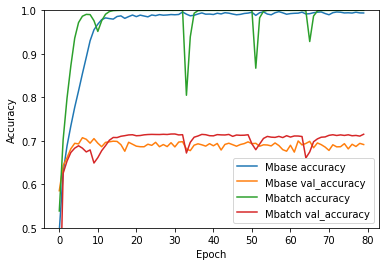

In [30]:
plt.plot(history.history['accuracy'], label='Mbase accuracy')
plt.plot(history.history['val_accuracy'], label = 'Mbase val_accuracy')
plt.plot(Mbatch_history.history['accuracy'], label='Mbatch accuracy')
plt.plot(Mbatch_history.history['val_accuracy'], label = 'Mbatch val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = Mbatch.evaluate(test_images,  test_labels, verbose=2)

In [31]:
print('Test Accuracy:',test_acc)
print('Time:',sum(cb.logs))

Test Accuracy: 0.7151666879653931
Time: 2527.7854298280013


In [32]:
y_pred = Mbatch.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(test_labels, y_pred_classes))

matrix = confusion_matrix(test_labels,y_pred_classes) 
print(matrix.diagonal()/matrix.sum(axis=1))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.76      0.76      1237
           1       0.82      0.82      0.82      1217
           2       0.62      0.58      0.60      1166
           3       0.50      0.49      0.49      1134
           4       0.68      0.69      0.69      1243
           5       0.62      0.60      0.61      1242
           6       0.76      0.80      0.78      1146
           7       0.76      0.75      0.76      1213
           8       0.82      0.86      0.84      1216
           9       0.76      0.79      0.78      1186

    accuracy                           0.72     12000
   macro avg       0.71      0.71      0.71     12000
weighted avg       0.71      0.72      0.71     12000

[0.75586095 0.81511915 0.58319039 0.48853616 0.692679   0.60386473
 0.80191972 0.7493817  0.86348684 0.78583474]


In [33]:
#creating model with dropout
Mdrop = models.Sequential()
Mdrop.add(layers.InputLayer(input_shape=(32,32,3)))
Mdrop.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
Mdrop.add(layers.MaxPooling2D(2,2))
Mdrop.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
Mdrop.add(layers.MaxPooling2D(2,2))
Mdrop.add(layers.Conv2D(48, (3,3), activation='relu', padding='same'))
Mdrop.add(layers.Flatten())
Mdrop.add(layers.Dense(500, activation='relu'))
Mdrop.add(layers.Dropout(0.5))
Mdrop.add(layers.Dense(10, activation='softmax'))

In [34]:
Mdrop.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 48)          13872     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)              

In [35]:
Mdrop.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [36]:
Mdrop_history = Mdrop.fit(train_images, 
                    train_labels, 
                    batch_size=128,
                    epochs=80,
                    validation_data=(val_images,val_labels),
                    callbacks = callbacks
                   )

Epoch 1/80
300/300 [==============================] - 15s 47ms/step - loss: 1.5261 - accuracy: 0.4488 - val_loss: 1.2420 - val_accuracy: 0.5592
Epoch 2/80
300/300 [==============================] - 15s 49ms/step - loss: 1.1760 - accuracy: 0.5829 - val_loss: 1.0554 - val_accuracy: 0.6239
Epoch 3/80
300/300 [==============================] - 16s 52ms/step - loss: 1.0036 - accuracy: 0.6448 - val_loss: 0.9445 - val_accuracy: 0.6680
Epoch 4/80
300/300 [==============================] - 14s 48ms/step - loss: 0.8843 - accuracy: 0.6896 - val_loss: 0.8740 - val_accuracy: 0.6972
Epoch 5/80
300/300 [==============================] - 16s 52ms/step - loss: 0.7909 - accuracy: 0.7235 - val_loss: 0.8853 - val_accuracy: 0.6968
Epoch 6/80
300/300 [==============================] - 15s 49ms/step - loss: 0.7181 - accuracy: 0.7487 - val_loss: 0.8638 - val_accuracy: 0.7044
Epoch 7/80
300/300 [==============================] - 16s 52ms/step - loss: 0.6328 - accuracy: 0.7760 - val_loss: 0.8248 - val_accuracy:

375/375 - 2s - loss: 2.1150 - accuracy: 0.7212


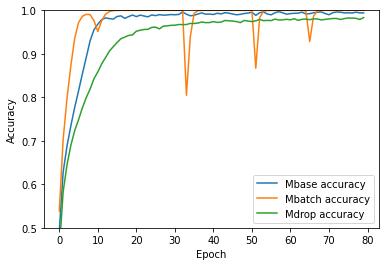

In [37]:
plt.plot(history.history['accuracy'], label='Mbase accuracy')
plt.plot(Mbatch_history.history['accuracy'], label='Mbatch accuracy')
plt.plot(Mdrop_history.history['accuracy'], label='Mdrop accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = Mdrop.evaluate(test_images,  test_labels, verbose=2)

In [38]:
print('Test Accuracy:',test_acc)
print('Time:',sum(cb.logs))

Test Accuracy: 0.7211666703224182
Time: 3722.4104644840013


In [39]:
y_pred = Mdrop.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(test_labels, y_pred_classes))

matrix = confusion_matrix(test_labels,y_pred_classes) 
print(matrix.diagonal()/matrix.sum(axis=1))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      1237
           1       0.86      0.84      0.85      1217
           2       0.65      0.57      0.61      1166
           3       0.50      0.51      0.50      1134
           4       0.67      0.70      0.69      1243
           5       0.64      0.61      0.63      1242
           6       0.78      0.77      0.78      1146
           7       0.71      0.80      0.75      1213
           8       0.82      0.86      0.84      1216
           9       0.81      0.79      0.80      1186

    accuracy                           0.72     12000
   macro avg       0.72      0.72      0.72     12000
weighted avg       0.72      0.72      0.72     12000

[0.7502021  0.83976993 0.56946827 0.50617284 0.70394208 0.6078905
 0.77486911 0.80049464 0.85773026 0.78752108]


In [40]:
#creating final model
Mfinal = models.Sequential()
Mfinal.add(layers.InputLayer(input_shape=(32,32,3)))
Mfinal.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
Mfinal.add(layers.BatchNormalization())
Mfinal.add(layers.MaxPooling2D(2,2))
Mfinal.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
Mfinal.add(layers.BatchNormalization())
Mfinal.add(layers.MaxPooling2D(2,2))
Mfinal.add(layers.Conv2D(48, (3,3), activation='relu', padding='same'))
Mfinal.add(layers.BatchNormalization())
Mfinal.add(layers.Flatten())
Mfinal.add(layers.Dense(500, activation='relu'))
Mfinal.add(layers.Dropout(0.5))
Mfinal.add(layers.BatchNormalization())
Mfinal.add(layers.Dense(10, activation='softmax'))

In [41]:
Mfinal.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 48)         

In [42]:
Mfinal.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [43]:
Mfinal_history = Mfinal.fit(train_images, 
                    train_labels, 
                    batch_size=128,
                    epochs=80,
                    validation_data=(val_images,val_labels),
                    callbacks = callbacks
                   )

Epoch 1/80
300/300 [==============================] - 19s 60ms/step - loss: 1.4211 - accuracy: 0.5154 - val_loss: 2.0799 - val_accuracy: 0.2641
Epoch 2/80
300/300 [==============================] - 19s 63ms/step - loss: 0.9606 - accuracy: 0.6635 - val_loss: 0.9275 - val_accuracy: 0.6725
Epoch 3/80
300/300 [==============================] - 17s 57ms/step - loss: 0.7766 - accuracy: 0.7263 - val_loss: 0.8789 - val_accuracy: 0.6963
Epoch 4/80
300/300 [==============================] - 17s 55ms/step - loss: 0.6499 - accuracy: 0.7749 - val_loss: 0.8506 - val_accuracy: 0.7117
Epoch 5/80
300/300 [==============================] - 18s 58ms/step - loss: 0.5449 - accuracy: 0.8103 - val_loss: 0.9018 - val_accuracy: 0.7027
Epoch 6/80
300/300 [==============================] - 20s 67ms/step - loss: 0.4540 - accuracy: 0.8414 - val_loss: 0.8597 - val_accuracy: 0.7153
Epoch 7/80
300/300 [==============================] - 16s 54ms/step - loss: 0.3771 - accuracy: 0.8676 - val_loss: 0.8870 - val_accuracy:

375/375 - 3s - loss: 1.8044 - accuracy: 0.7147


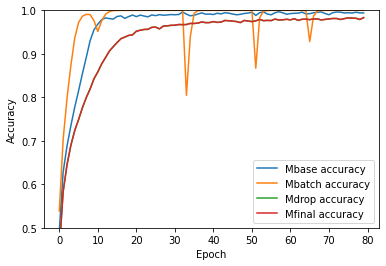

In [44]:
plt.plot(history.history['accuracy'], label='Mbase accuracy')
plt.plot(Mbatch_history.history['accuracy'], label='Mbatch accuracy')
plt.plot(Mdrop_history.history['accuracy'], label='Mdrop accuracy')
plt.plot(Mdrop_history.history['accuracy'], label='Mfinal accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = Mfinal.evaluate(test_images,  test_labels, verbose=2)

In [45]:
print('Test Accuracy:',test_acc)
print('Time:',sum(cb.logs))

Test Accuracy: 0.7146666646003723
Time: 5147.719329173008


In [46]:
y_pred = Mfinal.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(test_labels, y_pred_classes))

matrix = confusion_matrix(test_labels,y_pred_classes) 
print(matrix.diagonal()/matrix.sum(axis=1))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.74      0.75      1237
           1       0.79      0.87      0.82      1217
           2       0.55      0.67      0.61      1166
           3       0.51      0.51      0.51      1134
           4       0.71      0.63      0.67      1243
           5       0.65      0.54      0.59      1242
           6       0.77      0.81      0.79      1146
           7       0.75      0.79      0.77      1213
           8       0.81      0.88      0.85      1216
           9       0.85      0.71      0.78      1186

    accuracy                           0.71     12000
   macro avg       0.72      0.71      0.71     12000
weighted avg       0.72      0.71      0.71     12000

[0.74211803 0.86606409 0.67409949 0.50529101 0.62831858 0.53864734
 0.80715532 0.7873042  0.88075658 0.71163575]


In [47]:
submission = pd.DataFrame(y_pred_classes,columns=['class'])
submission.index.name = 'id'
submission

,class
id,
0,2
1,2
2,7
3,5
4,8
...,...
11995,2
11996,5
11997,1


In [48]:
submission.to_csv('submission.csv')

submission.head()

,class
id,
0,2
1,2
2,7
3,5
4,8
